In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
sns.set_theme(style="darkgrid")

In [2]:
original_data=pd.read_excel('/Users/sabinhashmi/Code Hub/CodeScripts/OzLottery/Complete_Data.xlsx')
print(f"Data Dimension is {original_data.shape}")

Data Dimension is (803, 10)


In [3]:
original_data['Year']=original_data['Date'].dt.year
original_data['Month']=original_data['Date'].dt.month
original_data['Day']=original_data['Date'].dt.day
original_data.drop(['S1','S2','Date'],axis=1,inplace=True)

In [4]:
original_data.head()

,#1,#2,#3,#4,#5,#6,#7,Year,Month,Day
0,3,12,14,17,33,42,44,2021,3,2
1,3,4,10,22,29,32,36,2021,2,23
2,6,14,15,19,29,40,45,2021,2,16
3,2,5,13,18,24,29,43,2021,2,9
4,3,14,16,17,26,42,44,2021,2,2


In [5]:
data=original_data[original_data.columns[:7]]
data['Sum']=data.sum(axis=1)

In [6]:
# for i in data.columns:
#     sns.countplot(data[i])
#     plt.show()

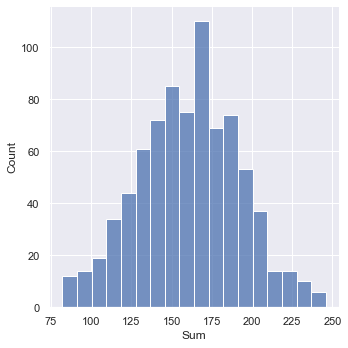

In [7]:
sns.displot(data['Sum'])

In [8]:
data.describe()

,#1,#2,#3,#4,#5,#6,#7,Sum
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.00000,803.000000,803.000000
mean,5.762142,11.351183,17.328767,23.032379,28.602740,34.33873,40.362391,160.778331
std,4.674114,6.200009,6.761819,6.681679,6.613886,5.98438,4.563700,31.645964
min,1.000000,2.000000,3.000000,6.000000,10.000000,12.00000,17.000000,82.000000
25%,2.000000,6.000000,12.000000,18.000000,24.000000,31.00000,38.000000,139.000000
50%,5.000000,10.000000,17.000000,23.000000,29.000000,35.00000,42.000000,162.000000
75%,8.000000,15.000000,22.000000,28.000000,34.000000,39.00000,44.000000,183.500000
max,28.000000,32.000000,39.000000,42.000000,43.000000,44.00000,45.000000,246.000000


In [9]:
most_occuring_data=pd.DataFrame(np.arange(1,50))
for i in data.columns[:-1]:
    most_occuring_data[i]=data[i].value_counts(ascending=False)

most_occuring_data=most_occuring_data.fillna(0).astype('int')
most_occuring_data.drop(0,inplace=True,axis=1)

most_occuring_data


,#1,#2,#3,#4,#5,#6,#7
0,0,0,0,0,0,0,0
1,125,0,0,0,0,0,0
2,116,21,0,0,0,0,0
3,92,39,1,0,0,0,0
4,68,42,6,0,0,0,0
5,69,54,12,0,0,0,0
6,61,47,14,1,0,0,0
7,62,51,24,3,0,0,0
8,34,58,23,2,0,0,0
9,30,58,30,8,0,0,0


In [10]:
data.drop('Sum',axis=1,inplace=True)
even=np.count_nonzero(data%2==0,axis=1)
odd=np.count_nonzero(data%2!=0,axis=1)

data['Even']=even 
data['Odd']=odd

In [11]:
data.head()

,#1,#2,#3,#4,#5,#6,#7,Even,Odd
0,3,12,14,17,33,42,44,4,3
1,3,4,10,22,29,32,36,5,2
2,6,14,15,19,29,40,45,3,4
3,2,5,13,18,24,29,43,3,4
4,3,14,16,17,26,42,44,5,2


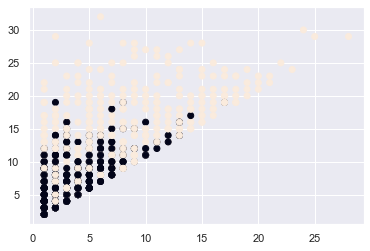

In [12]:
kmean=KMeans(n_clusters=2)
kmean.fit(data)
data['Label']=kmean.labels_
plt.scatter(data['#1'],data['#2'],c=data['Label'])

In [13]:
for i in most_occuring_data.columns:
    print(most_occuring_data[i].sort_values(ascending=False).head(10))

1     125
2     116
3      92
5      69
4      68
7      62
6      61
8      34
9      30
10     23
Name: #1, dtype: int64
8     58
9     58
5     54
7     51
11    47
6     47
12    44
4     42
3     39
10    39
Name: #2, dtype: int64
20    51
17    47
12    46
13    46
16    42
15    41
14    40
19    38
22    36
25    34
Name: #3, dtype: int64
22    53
27    51
21    50
26    46
19    40
24    39
28    39
25    37
17    37
16    37
Name: #4, dtype: int64
29    49
28    48
35    47
33    47
32    42
31    41
30    41
26    41
27    38
34    37
Name: #5, dtype: int64
37    66
36    62
33    58
41    50
39    48
42    43
32    42
34    42
38    41
40    40
Name: #6, dtype: int64
45    138
44    107
43     96
40     66
42     65
41     63
39     54
38     43
37     32
35     28
Name: #7, dtype: int64
